<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/Voronoi101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Voronoi diagrams in Python__

### How to use `SciPi` to create Voronoi polygons?

---

Import stantard libraries for plotting and necessary libraries from `SciPy`

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.collections import LineCollection

from matplotlib.patches import Polygon

mpl.rcParams['figure.figsize'] = (12,6)

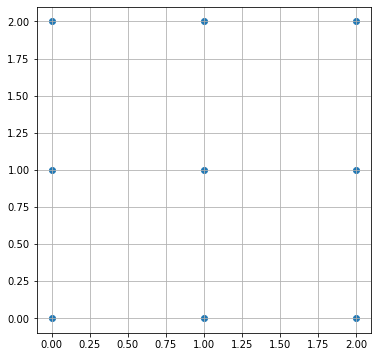

In [ ]:
### Visualization of a simple 3x3 rectangular grid with matplotlib
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]])   #Or feel free to use any set of points       
plt.figure(figsize=(6,6))
plt.scatter(points[:,0], points[:,1])
plt.grid();

First, create a Voronoi object using the coordinates of the points as an input

In [ ]:
### Creating Voronoi object
vor = Voronoi(points)

Then you have access to the following object properties:
```
vor.regions:          list of list of ints, shape (nregions+1)    # first entry is empty []
--------------------> Indices of the Voronoi vertices forming each Voronoi region. -1 indicates vertex outside the Voronoi diagram.
vor.max_bound:        numpy.ndarray, shape (ndims, *)
-------------------->
vor.ndim:             int, shape (1)
-------------------->
vor.ridge_dict*:      dict, shape (nridges)
-------------------->
vor.ridge_points:     numpy.ndarray, shape (nridges, ndims)
-------------------->
vor.ridge_vertices:   list of list of ints, shape (nridges, *)
-------------------->
vor.npoints:          int, shape (1)
-------------------->
vor.point_region:     numpy.ndarray, shape (npoints, *)
--------------------> Indices of the Voronoi region assigned to each point 
vor.points:           numpy.ndarray, shape (npoints, ndims)
-------------------->
```


### __Mapping__: Voronoi points, coordinates and regions.

\begin{align}
    M: p_i \to (x_i,y_i),\qquad & M(p_i)= (x_i, y_i)
\end{align}

---
\begin{align}
    \phi:p_i\to r_j,\qquad &\phi(p_i) = r_j 
\end{align}

In [ ]:
for i in range(vor.npoints):
    print("point #",i, ":    [x,y] =", vor.points[i],"   ->  region ",vor.point_region[i])

point # 0 :    [x,y] = [0. 0.]    ->  region  1
point # 1 :    [x,y] = [0. 1.]    ->  region  3
point # 2 :    [x,y] = [0. 2.]    ->  region  2
point # 3 :    [x,y] = [1. 0.]    ->  region  8
point # 4 :    [x,y] = [1. 1.]    ->  region  7
point # 5 :    [x,y] = [1. 2.]    ->  region  9
point # 6 :    [x,y] = [2. 0.]    ->  region  6
point # 7 :    [x,y] = [2. 1.]    ->  region  4
point # 8 :    [x,y] = [2. 2.]    ->  region  5


In [ ]:
def vpoint_to_xy(vor, index):
    return vor.points[index]

vpoint_to_xy(vor, 8)

array([2., 2.])

In [ ]:
def vpoint_to_region(vor, index):
    return vor.point_region[index]

vpoint_to_region(vor, 8)

5

### __Inverse mapping:__ $\phi^{-1}$ (Regions to points)

\begin{align}
    \phi^{-1}: r_j\to p_i,\qquad &\phi^{-1}(r_j) = p_i 
\end{align}

---

In [ ]:
for i in range(len(vor.regions)-1):
    print("region #", i+1," ->   point", np.where(vor.point_region == i+1)[0][0])

region # 1  ->   point 0
region # 2  ->   point 2
region # 3  ->   point 1
region # 4  ->   point 7
region # 5  ->   point 8
region # 6  ->   point 6
region # 7  ->   point 4
region # 8  ->   point 3
region # 9  ->   point 5


In [ ]:
def region_to_vpoint(vor, index):
    return np.where(vor.point_region == index)[0][0]

region_to_vpoint(vor, 8)

3

In [ ]:
def regions_to_vpoints(vor, regions):
    vpoints = []
    for i in regions:
        vpoints.append(region_to_vpoint(vor, i))
    return vpoints

regions_to_vpoints(vor, [1,2,3,4])

[0, 2, 1, 7]

In [ ]:
### Get Voronoi regions     (Vertices in each region)
print(vor.regions)

[[], [-1, 0], [-1, 1], [1, -1, 0], [3, -1, 2], [-1, 3], [-1, 2], [0, 1, 3, 2], [2, -1, 0], [3, -1, 1]]


In [ ]:
### Get Voronoi vertices (coordinates)
vor.vertices

array([[0.5, 0.5],
       [0.5, 1.5],
       [1.5, 0.5],
       [1.5, 1.5]])

In [ ]:
### Get Voronoi mapping (points to regions)
vor.point_region 

array([1, 3, 2, 8, 7, 9, 6, 4, 5])

### __Ridges__: Vertices and frontiers

In [ ]:
temp_dict = vor.ridge_dict
temp_keys = temp_dict.keys()

for key in temp_keys:
    print("p1 -> p2:  ", key[0],"->", key[1],"    |    vertices: ", temp_dict[key])
    if np.any(np.array(temp_dict[key]) == -1):
        pass
    else:
        print("                                  ", temp_dict[key][0]," (x1, y1):" , vor.vertices[temp_dict[key][0]])
        print("                                  ", temp_dict[key][1]," (x2, y2):" , vor.vertices[temp_dict[key][1]])


p1 -> p2:   0 -> 3     |    vertices:  [-1, 0]
p1 -> p2:   0 -> 1     |    vertices:  [-1, 0]
p1 -> p2:   2 -> 5     |    vertices:  [-1, 1]
p1 -> p2:   2 -> 1     |    vertices:  [-1, 1]
p1 -> p2:   1 -> 4     |    vertices:  [0, 1]
                                   0  (x1, y1): [0.5 0.5]
                                   1  (x2, y2): [0.5 1.5]
p1 -> p2:   7 -> 8     |    vertices:  [-1, 3]
p1 -> p2:   7 -> 6     |    vertices:  [-1, 2]
p1 -> p2:   7 -> 4     |    vertices:  [2, 3]
                                   2  (x1, y1): [1.5 0.5]
                                   3  (x2, y2): [1.5 1.5]
p1 -> p2:   8 -> 5     |    vertices:  [-1, 3]
p1 -> p2:   6 -> 3     |    vertices:  [-1, 2]
p1 -> p2:   4 -> 5     |    vertices:  [1, 3]
                                   1  (x1, y1): [0.5 1.5]
                                   3  (x2, y2): [1.5 1.5]
p1 -> p2:   4 -> 3     |    vertices:  [0, 2]
                                   0  (x1, y1): [0.5 0.5]
                                  

In [ ]:
vor.ridge_dict

{(0, 3): [-1, 0],
 (0, 1): [-1, 0],
 (2, 5): [-1, 1],
 (2, 1): [-1, 1],
 (1, 4): [0, 1],
 (7, 8): [-1, 3],
 (7, 6): [-1, 2],
 (7, 4): [2, 3],
 (8, 5): [-1, 3],
 (6, 3): [-1, 2],
 (4, 5): [1, 3],
 (4, 3): [0, 2]}

### Voronoi diagram visualization

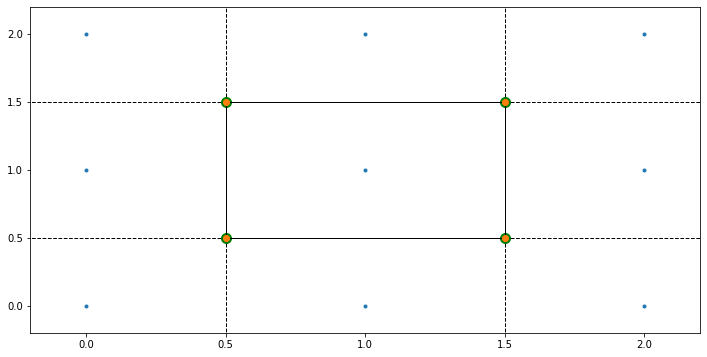

In [ ]:
### Use built-in function to plot 
voronoi_plot_2d(vor)
plt.scatter(vor.vertices[:,0], vor.vertices[:,1], color="green", s=100)
plt.show()

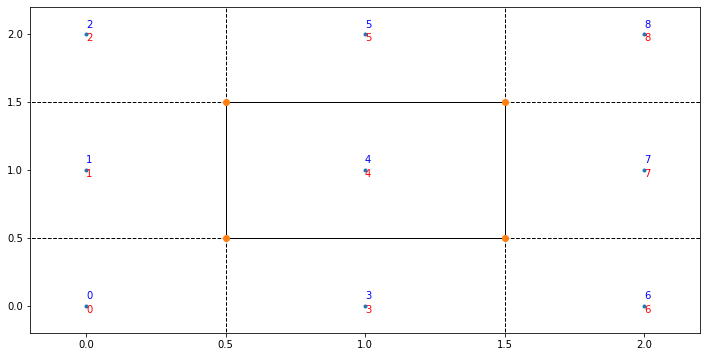

In [ ]:
### Use built-in function to plot 
voronoi_plot_2d(vor)

### Visualize points to coordinates
for i in range(vor.npoints):
    plt.text(vor.points[i,0], vor.points[i,1] + 0.05, f"{i}", color="blue")

### Visualize regions to points to coordinates
for j in range(len(vor.regions)-1):
    point = region_to_vpoint(vor, j+1)
    plt.text(vor.points[point,0], vor.points[point,1] - 0.05, f"{point}", color="red")

plt.show()

In [ ]:
### Get Voronoi ridge-vertices and ridge-points
vor.ridge_vertices;
vor.ridge_points;
vor.regions;